In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt_statsgraphstsa
import statsmodels.tsa.stattools as sts_statstsatool
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt

import seaborn as sns
sns.set()

**Importing Data and Pre-processing**


In [2]:
raw_csv_data = pd.read_csv('../01-Intro/IndexE8.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

**LLR Test**

In [5]:
def LLR_Test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2 * (L2-L1))
    p = chi2.sf(LR, DF). round(5)

    return p

**Creating Returns**

In [6]:
df['returns'] = df.market_value.pct_change(1) * 100

# In the previous notebook, we found out that the 6 and 8 numbers of lags
# are the best among the others, so we are using them.
mod_ret_ma_8 = ARIMA(df.returns[1:], order = (0, 0, 8))
res_ret_ma_8 = mod_ret_ma_8.fit()
print(res_ret_ma_8.summary())

C:\Users\Yago\AppData\Local\Temp\ipykernel_3820\1637472154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1) * 100


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Wed, 14 Dec 2022   AIC                          15791.205
Time:                        11:39:49   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

**Residuals for Returns**

In [8]:
df['res_ret_ma_8'] = res_ret_ma_8.resid[1:]

C:\Users\Yago\AppData\Local\Temp\ipykernel_3820\3278149969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ma_8'] = res_ret_ma_8.resid[1:]


In [9]:
print("The mean of the residuals: " + str(round(df.res_ret_ma_8.mean(), 3)) + "\n The variance of the residuals: " + str(round(df.res_ret_ma_8.var(), 3)))

The mean of the residuals: -0.0
 The variance of the residuals: 1.356


In [10]:
# Determ the standard deviation
round(sqrt(df.res_ret_ma_8.var()), 3)

1.164

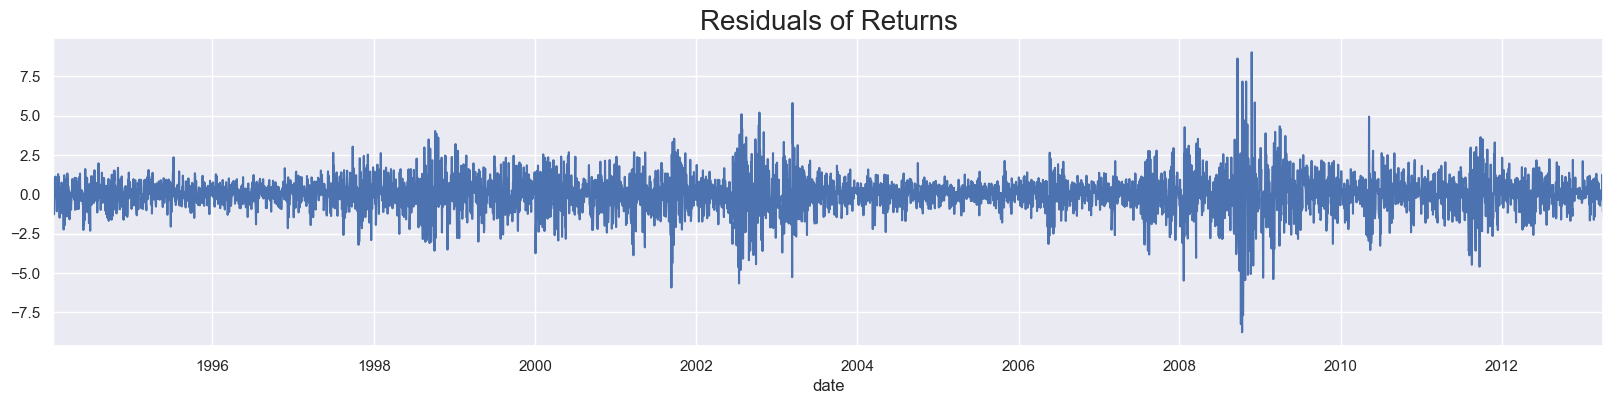

In [11]:
df.res_ret_ma_8[1:].plot(figsize = (20, 4))
plt.title('Residuals of Returns', size = 20)
plt.show()

In [12]:
# Verifying if the data is Stationary(True) -> P Value and Lags are 0
sts_statstsatool.adfuller(df.res_ret_ma_8[2:])

(-70.8353712572836,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.05221738929)

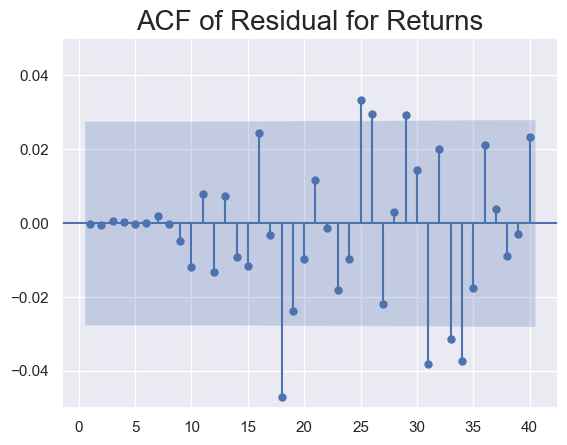

In [14]:
# Examining the ACF of the Residual
# WhiteNoise process produces completely random data, so all the ACF coefficients should not be significantly different from 0(Does not pierce through the blue line)
sgt_statsgraphstsa.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title('ACF of Residual for Returns', size = 20)
plt.ylim([-0.05, 0.05])
plt.show()

**Analysing MA Higher-lag 6**

In [16]:
mod_ret_ma_6 = ARIMA(df.returns[1:], order = (0, 0, 6))
res_ret_ma_6 = mod_ret_ma_6.fit()

df['res_ret_ma_6'] = res_ret_ma_6.resid[1:]

C:\Users\Yago\AppData\Local\Temp\ipykernel_3820\2030247819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ma_6'] = res_ret_ma_6.resid[1:]


In [17]:
print('The Mean of The Residual of Lag 6: ' + str(round(df.res_ret_ma_6.mean(), 3)))
print('The Variance of the Residual of Lag 6: ' + str(round(df.res_ret_ma_6.var(), 3)))

The Mean of The Residual of Lag 6: -0.0
The Variance of the Residual of Lag 6: 1.357


In [18]:
print('Standard Deviation of Lag 6: ' + str(round(sqrt(df.res_ret_ma_6.var()), 3)))

Standard Deviation of Lag 6: 1.165


Analysing Residuals and Stationary of Lag 6

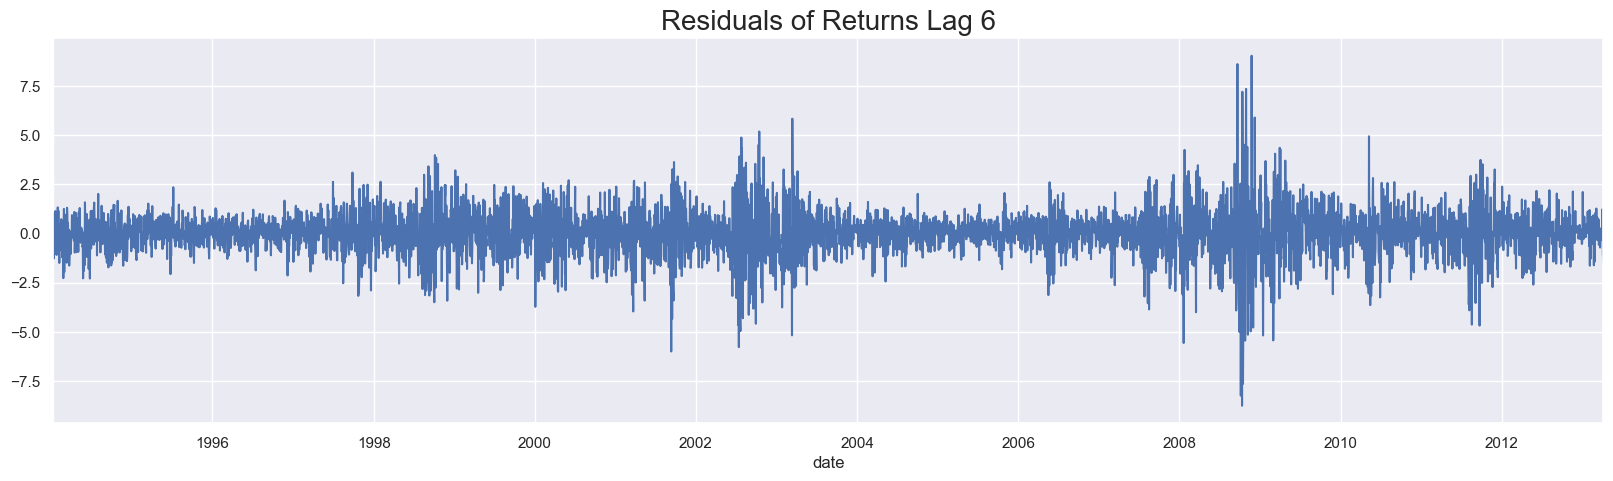

In [19]:
df.res_ret_ma_6[2:].plot(figsize = (20, 5))
plt.title('Residuals of Returns Lag 6', size = 20)
plt.show()

In [21]:
''' Testing Stationarity of the Data '''
sts_statstsatool.adfuller(df.res_ret_ma_6[2:])

(-70.83908082804538,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15691.135334745773)

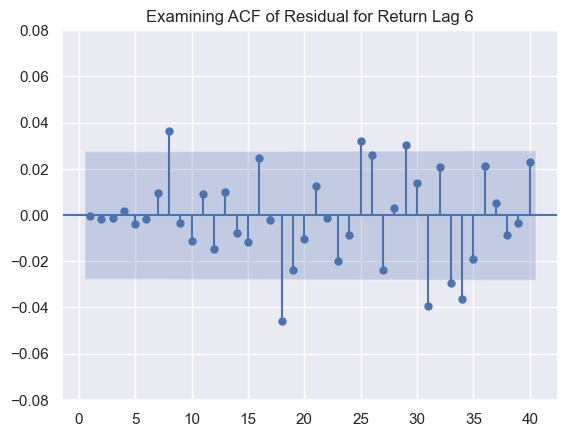

In [24]:
''' Examining the ACF of Residual for Return '''
sgt_statsgraphstsa.plot_acf(df.res_ret_ma_6[2:], zero = False, lags = 40)
plt.title('Examining ACF of Residual for Return Lag 6')
plt.ylim([-0.08, 0.08])
plt.show()

**Normalized Returns**

In [26]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

C:\Users\Yago\AppData\Local\Temp\ipykernel_3820\1184458836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_ret'] = df.returns.div(bench_ret).mul(100)


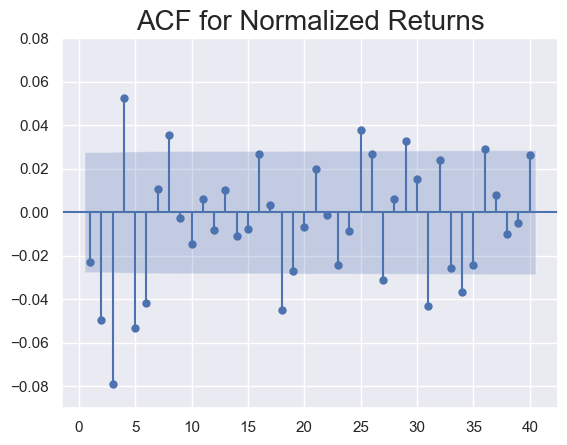

In [30]:
sgt_statsgraphstsa.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title('ACF for Normalized Returns', size = 20)
plt.ylim([-0.09,0.08])
plt.show()

In [32]:
mod_nor_ret_ma_8, mod_nor_ret_ma_6 = ARIMA(df.norm_ret[1:], order = (0, 0, 8)), ARIMA(df.norm_ret[1:], order = (0, 0, 6))
res_nor_ret_ma_8, res_nor_ret_ma_6 = mod_nor_ret_ma_8.fit(), mod_nor_ret_ma_6.fit()
res_nor_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -40311.224
Date:                Wed, 14 Dec 2022   AIC                          80638.448
Time:                        12:40:15   BIC                          80690.617
Sample:                    01-10-1994   HQIC                         80656.728
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.180     -1.304      0.192     -29.966       6.020
ma.L1         -0.0237      0.009     -2.556      0.011      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.967      0.000      -0.065      -0.033
ma.L3         -0.0827      0.008    -10.153      0.000      -0.099      -0.067
ma.L4          0.0466      0.009      5.372      0.000       0.030       0.064
ma.L5         -0.0484      0.008     -5.975      0.000      -0.064      -0.033
ma.L6         -0.0387      0.009     -4.307      0.000      -0.056      -0.021
sigma2       5.54e+05   6025.362     91.943      0.000    5.42e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6533.80
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
res_nor_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -40307.614
Date:                Wed, 14 Dec 2022   AIC                          80635.228
Time:                        12:40:39   BIC                          80700.440
Sample:                    01-10-1994   HQIC                         80658.079
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.658     -1.240      0.215     -30.902       6.956
ma.L1         -0.0238      0.009     -2.518      0.012      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.030      0.000      -0.066      -0.033
ma.L3         -0.0847      0.008    -10.271      0.000      -0.101      -0.069
ma.L4          0.0488      0.009      5.594      0.000       0.032       0.066
ma.L5         -0.0518      0.008     -6.281      0.000      -0.068      -0.036
ma.L6         -0.0402      0.009     -4.394      0.000      -0.058      -0.022
ma.L7          0.0084      0.009      0.935      0.350      -0.009       0.026
ma.L8          0.0365      0.009      3.866      0.000       0.018       0.055
sigma2      5.538e+05   6087.727     90.971      0.000    5.42e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6440.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
LLR_Test(mod_nor_ret_ma_6, mod_nor_ret_ma_8, DF = 2)

0.02705